In [16]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lars, Lasso, LassoLars
from sklearn.metrics import r2_score

In [2]:
convert = lambda x: x if 0 < x > 150 else 0
convert = np.vectorize(convert)

In [3]:
warnings.filterwarnings("ignore")

In [4]:
if not os.path.isdir("raw_data"):
    os.chdir("../")

In [5]:
data = pd.read_excel("raw_data/Статистика_для_графиков_3_д_ТЭЦ2_УРУТ_130.xlsx")

In [6]:
target = "Удельный расход условного топлива на отпуск э/э гр.130"

In [7]:
columns_for_predictions = [
    column
    for column in data.columns[:-1]
    if "130" in column and column != "Удельный расход тепла на выработку э/э ТА гр.130"
]

In [8]:
data = data[columns_for_predictions]

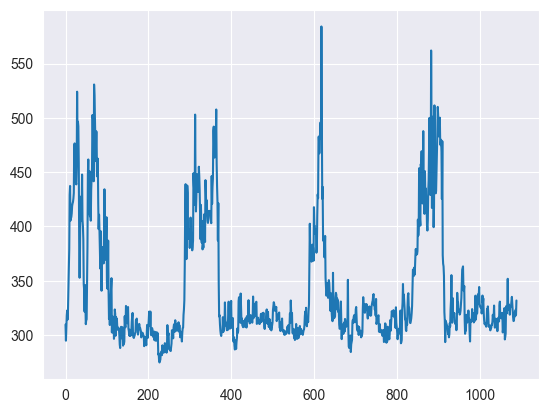

In [9]:
plt.plot(data[target]);

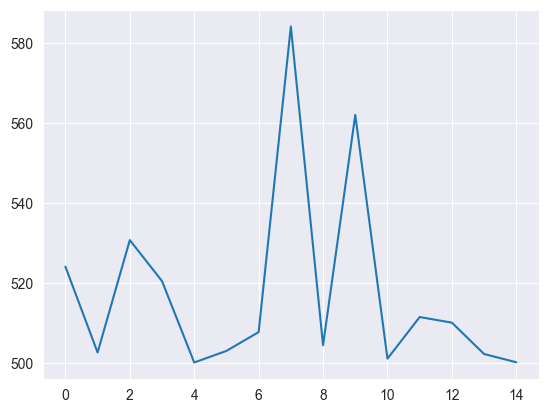

In [10]:
plt.plot(np.array(data.loc[data[target] > 500][target]));

In [11]:
data = data.loc[data[target] < 507]
data = data.loc[data[target] > 100]

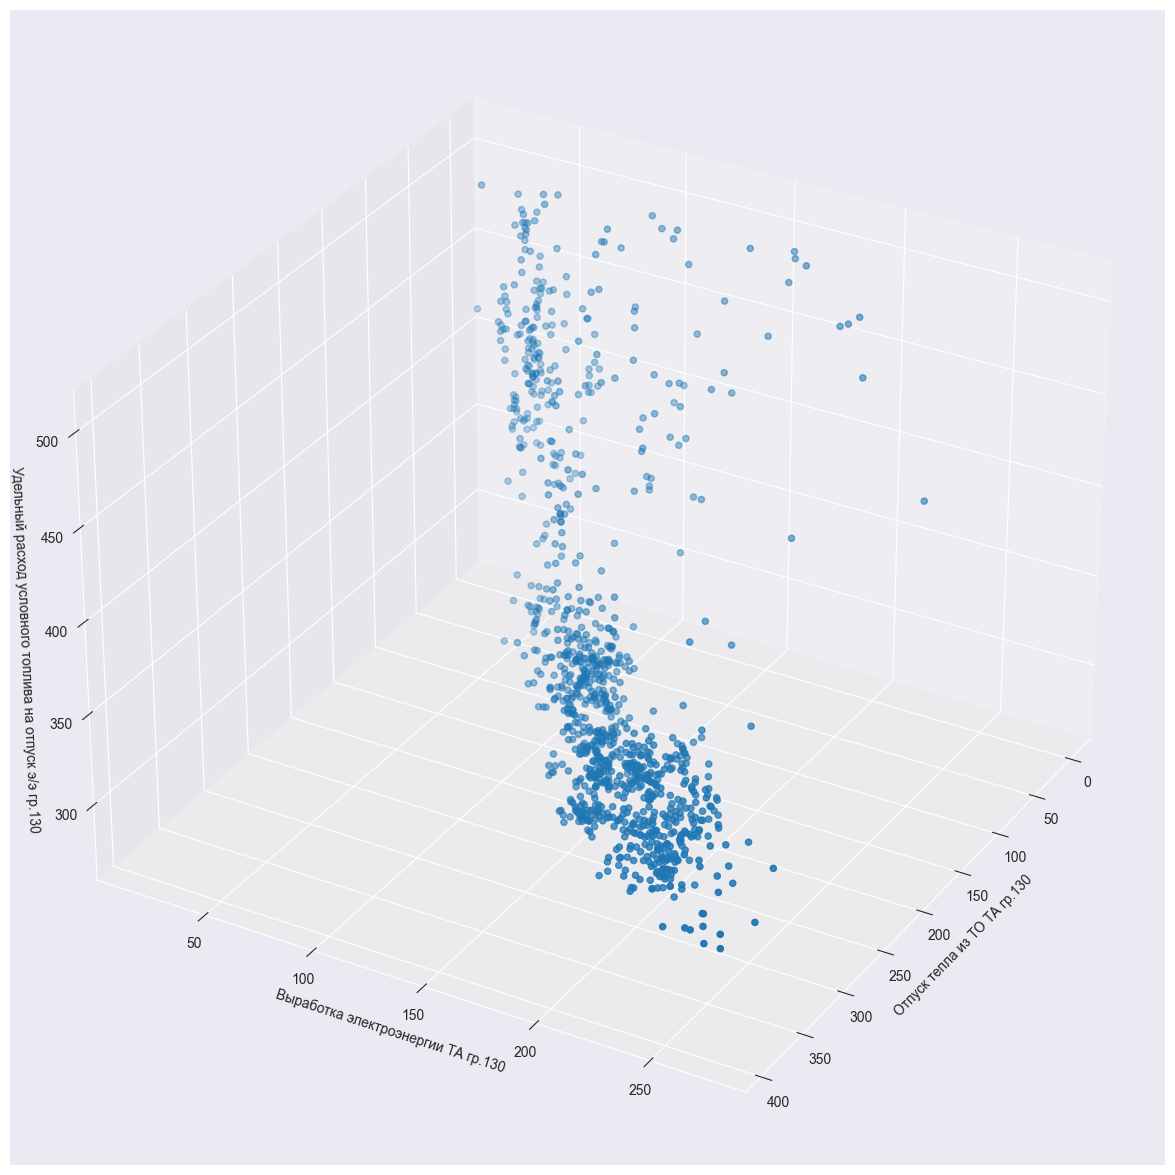

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
fig.set_figheight(15)
fig.set_figwidth(15)
ax.scatter(
    data[columns_for_predictions[1]],
    data[columns_for_predictions[0]],
    data[columns_for_predictions[2]]
)

ax.view_init(30, 30)
ax.set_xlabel(columns_for_predictions[1])
ax.set_ylabel(columns_for_predictions[0])
ax.set_zlabel(columns_for_predictions[2]);

In [13]:
X = data.drop(target, axis=1).to_numpy()

In [14]:
y = data[target].to_numpy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=30)

In [23]:
models = [
    Ridge(),
    LinearRegression(),
    Lasso(),
    Lars(),
    LassoLars()
]

In [24]:
result = {}

In [26]:
for model in models:
    result[model.__class__.__name__] = {}
    model.fit(X_train, y_train)
    result[model.__class__.__name__]["train"] = r2_score(y_train, model.predict(X_train))
    result[model.__class__.__name__]["test"] = r2_score(y_test, model.predict(X_test))

In [31]:
for _model, values in result.items():
    print(f"{_model} - train: {values['train']}, test: {values['test']}")

Ridge - train: 0.7131781813687567, test: 0.6875253957278615
LinearRegression - train: 0.7131781813693647, test: 0.6875253433814774
Lasso - train: 0.7131764887815282, test: 0.6876053338611123
Lars - train: 0.7131781813693647, test: 0.6875253433814772
LassoLars - train: 0.7131765412186968, test: 0.6876044976162752
